# How to use freely available rasters and shape files to detect poverty?

This notebook shows how to use luminosity satellite imagery (freely available) to calculate access to electricity on a county level in Romania.

This notebook shows several key ArcGIS Python functions such as:
- reprojecting shape and raster files to the relevant projection system
- clipping rasters to the shape of a polygon (extract by mask)
- Calculating Zonal Statistics and importing the values back to the polygon attribute table
- Analysing the resulting data using matplotlib.pyplot

The code can be obviously used for other types of raster files such as DEM.

# Data

## 1. Luminosity Data

I download the luminosity data from:
- https://ngdc.noaa.gov/eog/dmsp/downloadV4composites.html (August, 13, 2017)

I download the data called "Average Visible, Stable Lights, & Cloud Free Coverages" for 2013.
FYI, this is a big data file (approx. 400mb).
 
Once you open the archive, you will see several documents:
- F182013.v4c_web.avg_vis.tfw
- F182013.v4c_web.avg_vis.tif.gz
- F182013.v4c_web.cf_cvg.tfw
- F182013.v4c_web.cf_cvg.tif.gz
- F182013.v4c_web.stable_lights.avg_vis.tfw
- F182013.v4c_web.stable_lights.avg_vis.tif.gz

There are two further archives within this document: ```F182013.v4c_web.avg_vis.tif.gz``` and ```F182013.v4c_web.cf_cvg.tif.gz```. The one that you want is ```F182013.v4c_web.avg_vis.tif.gz```, which contains the lights from cities, towns, and other sites with persistent lighting, including gas flares. Ephemeral events, such as fires have been discarded. Then the background noise was identified and replaced with values of zero. Data values range from 1-63. Areas with zero cloud-free observations are represented by the value 255. The tif file has about 700MB.

Note: I change folder name "F182013.v4c_web.avg_vis.tif" to "web.avg_vis".

## 2. Shape Files

I download country shape files from:
- http://www.gadm.org/download (August, 13, 2017)

I download the data for Romania (file format: ESRI file geodatabase, called ROU_adm_gdb.zip). This is a relatively small file (approx. 5MB).

Once you open the archives, you should see the following:
- ROU_adm.gdb
- license.txt

## 3. Population Data

I dowload population data from :
- http://pop-stat.mashke.org (August, 13, 2017)

I download population data for Romania on a county level, corresponding to 2014. (http://pop-stat.mashke.org/romania-division.htm)

I manually copy the table to a CSV files.

# GIS Work

# 1. Define your working directory

In [1]:
path = "D:\\Tutorials\\Poverty\\"

# 2. Import ArcGIS libraries

In [2]:
# Import system modules
import sys, string, os, arcgisscripting
from IPython.display import Image

# Create the Geoprocessor object
gp = arcgisscripting.create()
print "created geoprocessor object"

# Check out any necessary licenses
gp.CheckOutExtension("spatial")
gp.CheckOutExtension("3D")
print "checked extensions"

#Turn overwrite on
gp.overwriteoutput = 1
print "overwrite on"

# Set Extent
gp.Extent = "MAXOF"

created geoprocessor object
checked extensions
overwrite on


# 3. Examine Original files (optional)

## Luminosity Data

In [3]:
arcpy.env.workspace = path + "F182013.v4\\web.avg_vis"
fds=arcpy.ListDatasets()
for fd in fds:
    print fd

web.avg_vis.tif


In [4]:
# Process: Create Folder
arcpy.CreateFolder_management(path, "pics")
print "Folder created"

Folder created


We will now visualize the raster. Create a blank mxd file manually from ArcGIS, called "tutorial" in your working directory. In this case it is in ...```...Tutorials\\Poverty```.

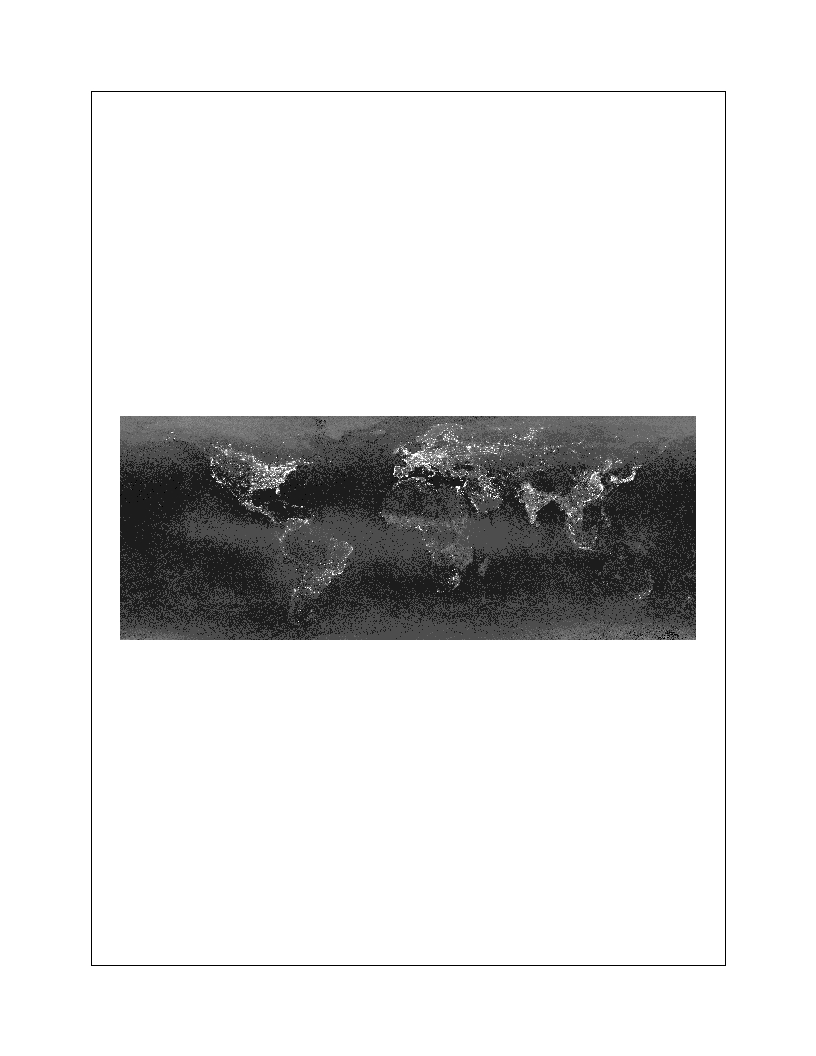

In [5]:
mxdPath = path + "tutorial.mxd"
filePath = path + "F182013.v4\\web.avg_vis\\web.avg_vis.tif"
fileLayerName = 'F182013.v4c_web.avg_vis.tif'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeRasterLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "pics\\web_avg_vis")
Image(path + "pics\\web_avg_vis.jpg")

## Shape files

In [6]:
arcpy.env.workspace =  path +"ROU_adm_gdb\\ROU_adm.gdb"
fds=arcpy.ListFeatureClasses()
for fd in fds:
    print fd

ROU_adm0
ROU_adm1
ROU_adm2


We will now visualize the shapefiles. The following picture display the Romanian districts.

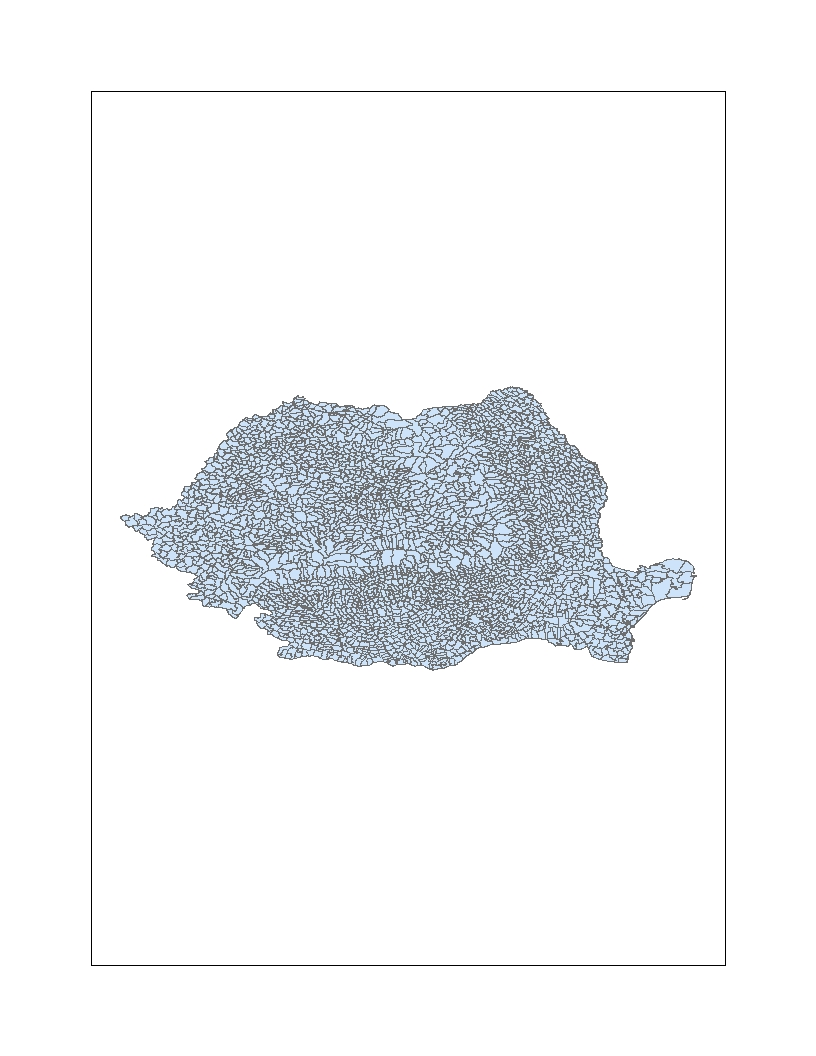

In [8]:
mxdPath = path + "tutorial2.mxd"
filePath = path + "ROU_adm_gdb\\ROU_adm.gdb\\ROU_adm2"
fileLayerName = 'ROU_adm2'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "pics\\ROU_adm2")
Image(path + "pics\\ROU_adm2.jpg")

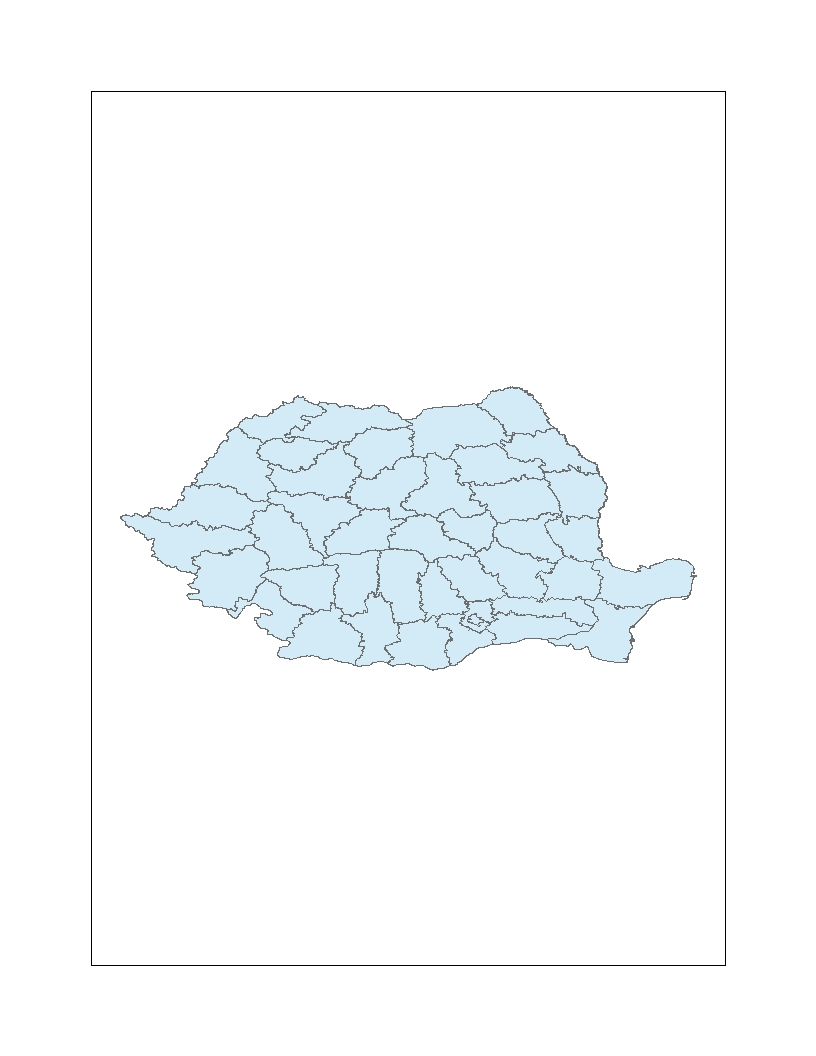

In [10]:
mxdPath = path + "tutorial3.mxd"
filePath = path + "ROU_adm_gdb\\ROU_adm.gdb\\ROU_adm1"
fileLayerName = 'ROU_adm1'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "pics\\ROU_adm1")
Image(path + "pics\\ROU_adm1.jpg")

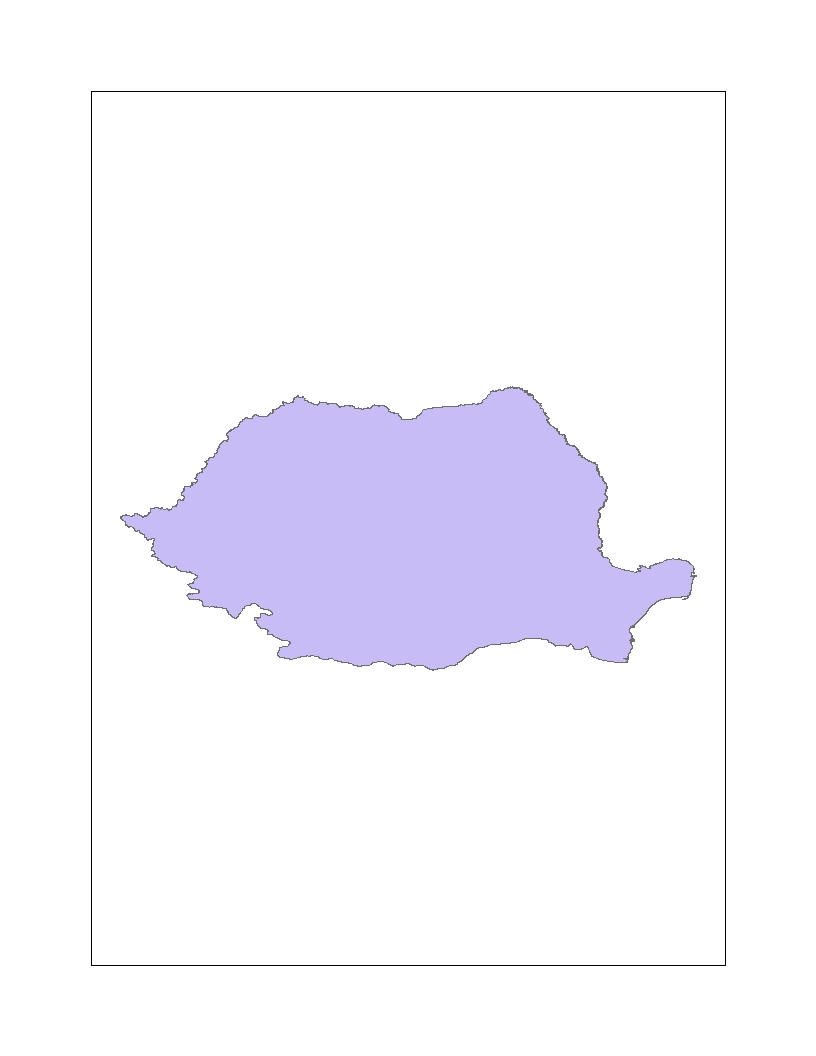

In [12]:
mxdPath = path + "tutorial4.mxd"
filePath = path + "ROU_adm_gdb\\ROU_adm.gdb\\ROU_adm0"
fileLayerName = 'ROU_adm0'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "pics\\ROU_adm0")
Image(path + "pics\\ROU_adm0.jpg")

# 5. Create Geodatabase

In [13]:
arcpy.CreateFileGDB_management(path, "lights.gdb", "CURRENT")
print "Geodatabse created"

Geodatabse created


# 6. Project shape files to WGS_1984_UTM_Zone_35N

In [14]:
# Local variables:
ROU_adm0 = path + "ROU_adm_gdb\\ROU_adm.gdb\\ROU_adm0"
ROU_adm0__2_ = path + "lights.gdb\\ROU_adm0"
# Process: Project
arcpy.Project_management(ROU_adm0, ROU_adm0__2_, "PROJCS['WGS_1984_UTM_Zone_35N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',27.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
print "Projected ROU_adm0"

# Local variables:
ROU_adm1 = path + "ROU_adm_gdb\\ROU_adm.gdb\\ROU_adm1"
ROU_adm1__2_ = path + "lights.gdb\\ROU_adm1"
# Process: Project
arcpy.Project_management(ROU_adm1, ROU_adm1__2_, "PROJCS['WGS_1984_UTM_Zone_35N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',27.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
print "Projected ROU_adm1"

# Local variables:
ROU_adm2 = path + "ROU_adm_gdb\\ROU_adm.gdb\\ROU_adm2"
ROU_adm2__2_ = path + "lights.gdb\\ROU_adm2"
# Process: Project
arcpy.Project_management(ROU_adm2, ROU_adm2__2_, "PROJCS['WGS_1984_UTM_Zone_35N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',27.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
print "Projected ROU_adm2"


Projected ROU_adm0
Projected ROU_adm1
Projected ROU_adm2


# 7. Projecting luminosity raster to WGS_1984_UTM_Zone_35N

Before you proceed with the reprojection of the data, make sure that that accompanying TFW file is in the same folder with the tif file.

Specifying the sampling technique is important since that could alter the value of your cells. The NEAREST and MAJORITY options are used for categorical data, while BILINEAR option and the CUBIC option are most appropriate for continuous data. In this case, we will be using NEAREST, since we are dealing with categorical data.

Note: Reprojecting this file can take a couple of minutes.

In [15]:
# Local variables:
raster1_tif = path + "F182013.v4\\web.avg_vis\\web.avg_vis.tif"
web_avg_vis = path + "lights.gdb\\web_avg_vis"

gp.Extent = path + "lights.gdb\\ROU_adm0"

# Process: Project Raster
arcpy.ProjectRaster_management(raster1_tif, web_avg_vis, "PROJCS['WGS_1984_UTM_Zone_35N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',27.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "NEAREST", "828.688199725954 828.688199725954", "", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]")
print "Projected raster"


Projected raster


# 8. Extracting by mask

We are now clipping the reprojected raster to the shape of Romania

In [16]:
##Extracting by mask elevation
web_avg_vis = path + "lights.gdb\\web_avg_vis"
ROU_adm0__2_ = path + "lights.gdb\\ROU_adm0"
web_avg_vis_ROU = path + "lights.gdb\\web_avg_vis_ROU"
arcpy.gp.ExtractByMask_sa(web_avg_vis, ROU_adm0__2_, web_avg_vis_ROU)
print "Extracted rasters to the shape of the country"

Extracted rasters to the shape of the country


Visualizing the result

In [17]:
# Process: Create Folder
arcpy.CreateFolder_management(path, "layers")
print "Folder created"

Folder created


In [18]:
filePath = path + "lights.gdb\\web_avg_vis_ROU"
fileLayerName = 'web_avg_vis_ROU1'
result = arcpy.MakeRasterLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)

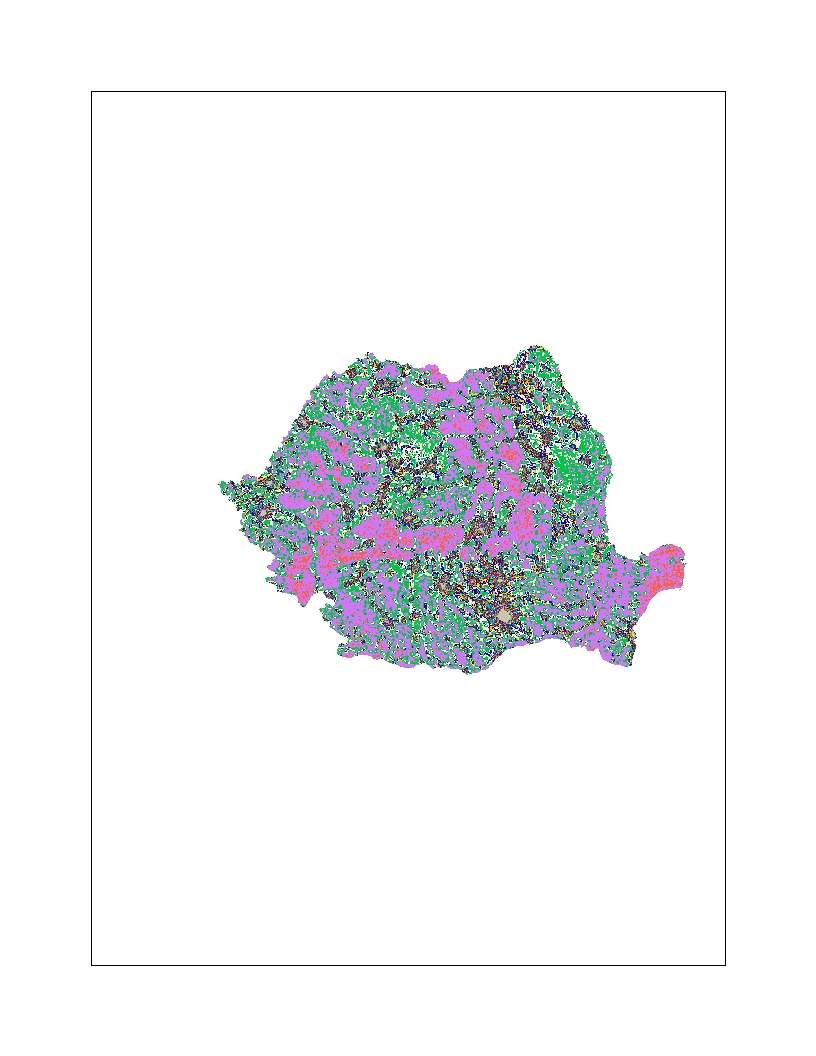

In [19]:
mxdPath = path + "tutorial6.mxd"
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
#lyr = arcpy.mapping.ListLayers(mxdPath, "web_avg_vis_ROU")[0]
#symbologySource = arcpy.mapping.Layer(r"D:\Tutorials\Poverty\layers\web_avg_vis.lyr")
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.RefreshActiveView()
arcpy.RefreshTOC()
df.scale = 6000000 # we set the scale to 1:20,000 

#df.extent = layer.getSelectedExtent()
arcpy.mapping.ExportToJPEG(md, path + "pics\\web_avg_vis_ROU",  "PAGE_LAYOUT")
Image(path + "pics\\web_avg_vis_ROU.jpg")

Ignore the symbology. The map above displays unique values, which are necessary to calculate luminosity means at a county level in Romania.

# 9. Creating Unique ID

In [20]:
# Process: Add Field
arcpy.AddField_management(ROU_adm1__2_, "ID", "LONG", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")
print "Added Field to the District Shape file"

Added Field to the District Shape file


# 10. Adding Incremental ID

In [21]:
# Process: Calculate Field
arcpy.CalculateField_management(ROU_adm1__2_, "ID", "autoIncrement()", "PYTHON_9.3", "rec=0 \\ndef autoIncrement(): \\n global rec \\n pStart = 1  \\n pInterval = 1 \\n if (rec == 0):  \\n  rec = pStart  \\n else:  \\n  rec += pInterval  \\n return rec")
print "Added Incremental ID to District Shape file"

Added Incremental ID to District Shape file


# 11. Creating New Folder

In [22]:
# Process: Create Folder
arcpy.CreateFolder_management(path, "dbf_light")
print "Created Folder"

Created Folder


# 12. Calculating Zonal Statistics

In [23]:
dbf_prefix = path + "dbf_light\\"
arcpy.env.workspace = path + "lights.gdb"
raster_names = arcpy.ListRasters("web_avg_vis_ROU")
for name in raster_names:
     name_input = name
     name_output = dbf_prefix + name + '.dbf'
     print "Processing %s" % name
     arcpy.gp.ZonalStatisticsAsTable_sa(ROU_adm1__2_, "ID",  name_input, name_output, "DATA", "MEAN")
print "Zonal Stats complete"

Processing web_avg_vis_ROU
Zonal Stats complete


# 13. Join Field

In [24]:
### Process: Join Field
for name in raster_names:
     print "Processing %s" % name 
     name_output = dbf_prefix + name + '.dbf'
     arcpy.JoinField_management(ROU_adm1__2_, "ID", name_output, "ID", "MEAN")
     arcpy.AlterField_management(ROU_adm1__2_, "MEAN", name, "", "DOUBLE", "8", "NULLABLE", "false")

print "Joined tables"

Processing web_avg_vis_ROU
Joined tables


In [25]:
arcpy.env.workspace = path + "lights.gdb"
fields = arcpy.ListFields(path + "lights.gdb/ROU_adm1", "web_avg_vis_ROU")
mxd = arcpy.mapping.MapDocument(path + "tutorial7.mxd")

districts = arcpy.mapping.ListLayers(mxd)[0]

for field in fields:
    print field.name
    districts.symbology.valueField = field.name
    #The line below is optional.
    districts.symbology.numClasses = 5
    out_filename = path + "pics\{}.jpg".format(field.name)
    #print out_filename
    arcpy.mapping.ExportToJPEG(mxd, out_filename)

web_avg_vis_ROU


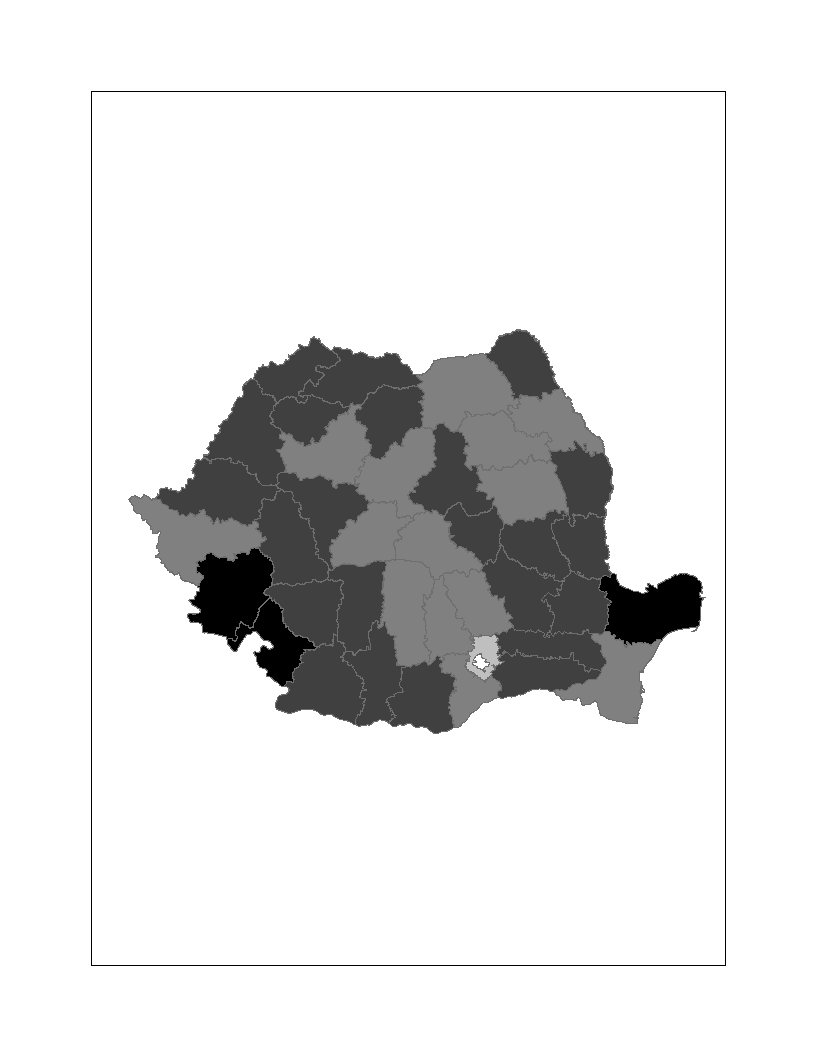

In [26]:
Image (path + "\\pics\\web_avg_vis_ROU.jpg")

# 14. Joining county population Data

In [27]:
# Local variables:
pop2 = path + "pop2.txt"
ROU_adm1 = path + "lights.gdb\\ROU_adm1"
pop2_dbf = "D:\\Tutorials\\Poverty\\lights.gdb\\pop2"

# Process: Table to Table
arcpy.TableToTable_conversion(pop2, path + "lights.gdb", "pop2", "", "Județ \"Județ\" true true false 8000 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\pop2.txt,Județ,-1,-1;Pop \"Pop\" true true false 8000 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\pop2.txt,Pop,-1,-1", "")
print "Converted Unicode txt file to DBF file"

Converted Unicode txt file to DBF file


In [28]:
# Process: Join Field
arcpy.JoinField_management(ROU_adm1, "NAME_1", pop2_dbf, "Județ", "Pop")
print "Joined dbf variables to shape file"

Joined dbf variables to shape file


# 15. Converting string to double 

In [32]:
# Local variables:
ROU_adm1 = path + "lights.gdb\\ROU_adm1"

# Process: Add Field
arcpy.AddField_management(ROU_adm1, "population", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ROU_adm1, "population", "[Pop]", "VB", "")
print "Converted string to double"

Converted string to double


# 16 Dividing the intensity of light by county population size

I decided to divide intensity of light by the size of population since that is likely to give an accurate representation of what the counties with highest need for electricity is. In other words, we need to look at light weighted by the size of population.

In [34]:
# Local variables:
ROU_adm1 = path + "lights.gdb\\ROU_adm1"

# Process: Add Field
arcpy.AddField_management(ROU_adm1, "light_pop", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ROU_adm1__2_, "light_pop", "[web_avg_vis_ROU]/ [population]", "VB", "")
print "Calculated light/population"

Calculated light/population


# 17. Inspecting the calculation

In [35]:
arcpy.env.workspace = path + "lights.gdb"
fields = arcpy.ListFields(path + "lights.gdb/ROU_adm1", "light_pop")
mxd = arcpy.mapping.MapDocument(path + "tutorial8.mxd")

districts = arcpy.mapping.ListLayers(mxd)[0]

for field in fields:
    print field.name
    districts.symbology.valueField = field.name
    #The line below is optional.
    districts.symbology.numClasses = 5
    out_filename = path + "pics\{}.jpg".format(field.name)
    #print out_filename
    arcpy.mapping.ExportToJPEG(mxd, out_filename)

light_pop


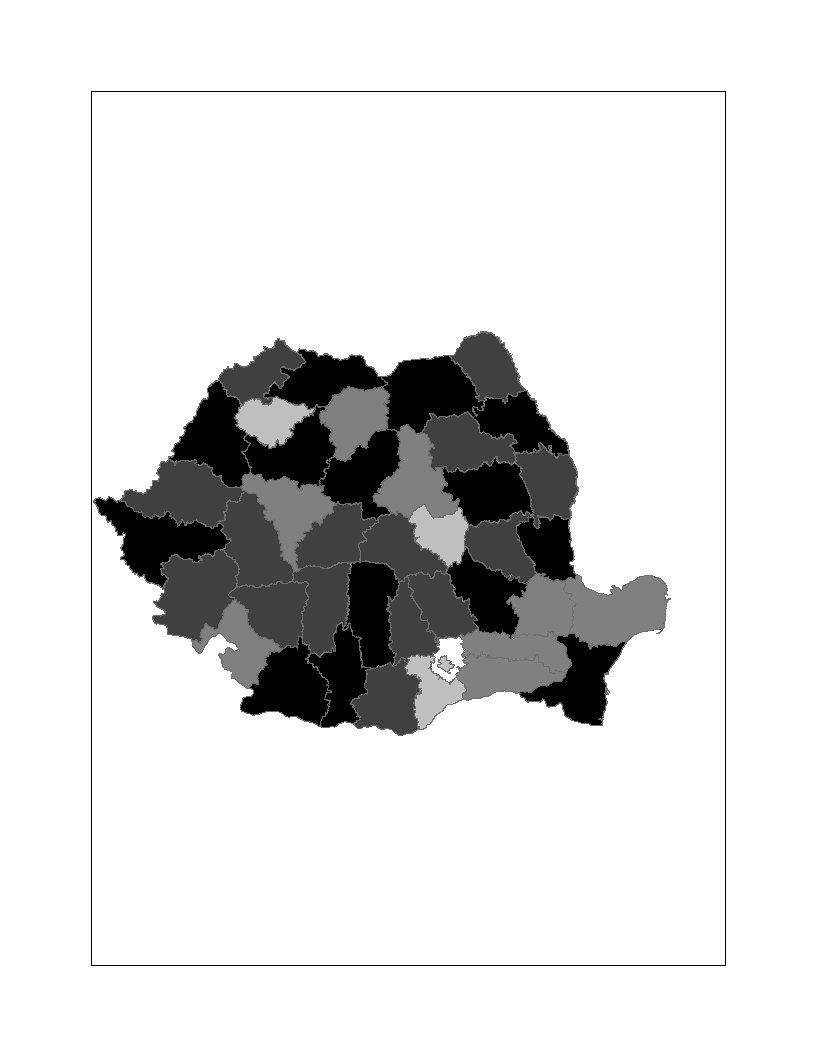

In [36]:
Image (path + "\\pics\\light_pop.jpg")

# 18. Exporting attribute table

In [37]:
# Local variables:
ROU_adm1 = path + "lights.gdb\\ROU_adm1"

# Process: Table to Table
arcpy.TableToTable_conversion(ROU_adm1, path, "table.txt", "", "ID_0 \"ID_0\" true true false 4 Long 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,ID_0,-1,-1;ISO \"ISO\" true true false 3 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,ISO,-1,-1;NAME_0 \"NAME_0\" true true false 75 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,NAME_0,-1,-1;ID_1 \"ID_1\" true true false 4 Long 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,ID_1,-1,-1;NAME_1 \"NAME_1\" true true false 75 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,NAME_1,-1,-1;HASC_1 \"HASC_1\" true true false 15 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,HASC_1,-1,-1;CCN_1 \"CCN_1\" true true false 4 Long 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,CCN_1,-1,-1;CCA_1 \"CCA_1\" true true false 255 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,CCA_1,-1,-1;TYPE_1 \"TYPE_1\" true true false 50 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,TYPE_1,-1,-1;ENGTYPE_1 \"ENGTYPE_1\" true true false 50 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,ENGTYPE_1,-1,-1;NL_NAME_1 \"NL_NAME_1\" true true false 50 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,NL_NAME_1,-1,-1;VARNAME_1 \"VARNAME_1\" true true false 150 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,VARNAME_1,-1,-1;Shape_Length \"Shape_Length\" false true true 8 Double 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,Shape_Length,-1,-1;Shape_Area \"Shape_Area\" false true true 8 Double 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,Shape_Area,-1,-1;ID \"ID\" true true false 4 Long 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,ID,-1,-1;web_avg_vis \"web_avg_vis\" true true false 8 Double 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,web_avg_vis,-1,-1;web_avg_vis_ROU \"web_avg_vis_ROU\" true true false 8 Double 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,web_avg_vis_ROU,-1,-1;Pop \"Pop\" true true false 8000 Text 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,Pop,-1,-1;population \"population\" true true false 8 Double 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,population,-1,-1;light_pop \"light_pop\" true true false 8 Double 0 0 ,First,#,D:\\Tutorials\\Poverty\\lights.gdb\\ROU_adm1,light_pop,-1,-1", "")
print "Exported Table to txt"


Exported Table to txt


# 19. Analyzing the results in Python

## Importing pandas, numpy and matplotlib

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Inspecting the recently exported attribute table

In [40]:
%matplotlib inline
rou=pd.read_csv(path + "table.txt")
rou.head()

,OID,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,...,NL_NAME_1,VARNAME_1,Shape_Length,Shape_Area,ID,web_avg_vis,web_avg_vis_ROU,Pop,population,light_pop
0,-1,187,ROU,Romania,1,Alba,RO.AB,NaN,NaN,Judet,...,NaN,NaN,649229.683622,6.249610e+09,1,NaN,6.781147,"337,658",337658,0.000020
1,-1,187,ROU,Romania,2,Arad,RO.AR,NaN,NaN,Judet,...,NaN,NaN,621159.319689,7.770464e+09,2,NaN,6.333598,"427,974",427974,0.000015
2,-1,187,ROU,Romania,3,Argeș,RO.AG,NaN,NaN,Judet,...,NaN,Arges,594767.283206,6.824021e+09,3,NaN,7.609041,"604,058",604058,0.000013
3,-1,187,ROU,Romania,4,Bacău,RO.BC,NaN,NaN,Judet,...,NaN,Bacau,578823.219047,6.614251e+09,4,NaN,7.183790,"606,589",606589,0.000012
4,-1,187,ROU,Romania,5,Bihor,RO.BH,NaN,NaN,Judet,...,NaN,NaN,586470.458188,7.566887e+09,5,NaN,6.483312,"573,691",573691,0.000011


# Summary stats of the light_pop variable

In [41]:
rou['light_pop'].describe()

count    42.000000
mean      0.000018
std       0.000008
min       0.000009
25%       0.000013
50%       0.000016
75%       0.000020
max       0.000059
Name: light_pop, dtype: float64

## Summary for county names ```NAME_1```

In [42]:
rou['NAME_1'].describe()

count        42
unique       42
top       Buzău
freq          1
Name: NAME_1, dtype: object

## Identifying variable types

In [43]:
rou.dtypes

OID                  int64
ID_0                 int64
ISO                 object
NAME_0              object
ID_1                 int64
NAME_1              object
HASC_1              object
CCN_1              float64
CCA_1              float64
TYPE_1              object
ENGTYPE_1           object
NL_NAME_1          float64
VARNAME_1           object
Shape_Length       float64
Shape_Area         float64
ID                   int64
web_avg_vis        float64
web_avg_vis_ROU    float64
Pop                 object
population         float64
light_pop          float64
dtype: object

In [44]:
total = rou[['NAME_1','light_pop']]
total.head()

,NAME_1,light_pop
0,Alba,0.000020
1,Arad,0.000015
2,Argeș,0.000013
3,Bacău,0.000012
4,Bihor,0.000011


## Sorting the list based on values of light_pop

In [45]:
sorted_list=total.sort(columns='light_pop', ascending=False)
sorted_list.head()

,NAME_1,light_pop
25,Ilfov,0.000059
9,Bucharest,0.000033
19,Giurgiu,0.000030
15,Covasna,0.000028
32,Sălaj,0.000026


## Plotting the findings

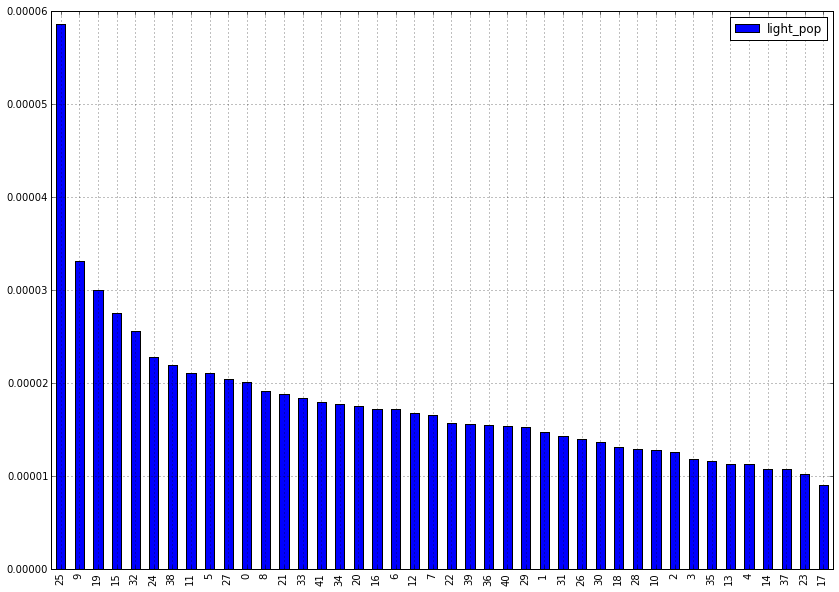

In [46]:
my_plot = sorted_list.plot(kind='bar', figsize=(14, 10))

In [47]:
sorted_list["NAME_1"]

25              Ilfov
9           Bucharest
19            Giurgiu
15            Covasna
32              Sălaj
24           Ialomița
38             Tulcea
11           Călărași
5     Bistrița-Năsăud
27          Mehedinți
0                Alba
8              Brăila
21           Harghita
33          Satu Mare
41            Vrancea
34              Sibiu
20               Gorj
16          Dâmbovița
6            Botoșani
12      Caraș-Severin
7              Brașov
22          Hunedoara
39             Vâlcea
36          Teleorman
40             Vaslui
29              Neamț
1                Arad
31            Prahova
26          Maramureș
30                Olt
18             Galați
28              Mureș
10              Buzău
2               Argeș
3               Bacău
35            Suceava
13               Cluj
4               Bihor
14          Constanța
37              Timiș
23               Iași
17               Dolj
Name: NAME_1, dtype: object

Not surpisingly, Ilfov county (25), close to the capital of Bucharest has the highest luminosity while Dolj county (17) has the lowest, given the number the number of people living there.